In [1]:
import os
from os.path import isdir, join

from pathlib import Path
import pandas as pd
import time
#loadmat
from scipy.io import loadmat,savemat

# Math
import numpy as np
from scipy.fftpack import fft, dct
from scipy import signal
from scipy.stats import norm,multivariate_normal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

#math
import math

%matplotlib inline

# Frame the problem

this is a simple multi-class recognition problem for recognizing the speaker

# 1. Import data

In [2]:
#audio_path = "D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test"
audio_path = "/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test"

we import all the data in the test file and stored them into the dictionary, each 'name' as keys in dictionary has length 10 list as value items, each of them is the samples read from wav files

In [3]:
def load_data(audio_train_path):
    Name_set={}
    test_set=[]
    count =0
    for area in os.listdir(audio_train_path):#os.listdit: to show the files in this path
        #for name in os.listdir(audio_train_path+'\\'+area+"\\"):
        if (area=='.DS_Store'):
            continue
        else:
            for name in os.listdir(audio_train_path+'/'+area+"/"):
                if (name =='.DS_Store'):
                    continue
                else:
                    Name_set.setdefault(name)  #add new key to the dict
                    sample_set=[]
                    #print (name)
                    #count +=1
                    #print (count)
                    #for files in os.listdir(audio_train_path+'\\'+area+'\\'+name+'\\'):
                    for files in os.listdir(audio_train_path+'/'+area+'/'+name+'/'):
                        #_,samples=wavfile.read(audio_train_path+'\\'+area+'\\'+name+'\\'+files)#read the wavfile , return sample_rate ,and samples
                        _,samples=wavfile.read(audio_train_path+'/'+area+'/'+name+'/'+files)
                        sample_set.append(samples)
                        Name_set[name]=sample_set
    return Name_set

In [4]:
dataset=load_data(audio_path)

In [5]:
dataset.keys()

dict_keys(['mgmm0', 'mtls0', 'fnmr0', 'frng0', 'mplb0', 'flkd0', 'frew0', 'mjrf0', 'fcrh0', 'mlll0', 'fadg0', 'mkcl0', 'fjmg0', 'mteb0', 'fmcm0', 'mdls0', 'mdrm0', 'fdms0', 'fedw0', 'fgjd0', 'mljb0', 'mroa0', 'fjlm0', 'flbw0', 'mpwm0', 'fcft0', 'mbns0', 'mrko0', 'fsem0', 'mpcs0', 'mjdm1', 'fmaf0', 'fslb1', 'mrcz0', 'mtmr0', 'mwvw0', 'mdld0', 'fdrd1', 'fjwb0', 'mtas1', 'fjas0', 'mgwt0', 'mjar0', 'fpas0', 'mcem0', 'fcmr0', 'mpgl0', 'mmdm2', 'mmdb1', 'mccs0', 'mrgg0', 'mdbb0', 'mabw0', 'mwew0', 'mpdf0', 'mbjk0', 'fram1', 'fjre0', 'fnlp0', 'mdrb0', 'mcrc0', 'mctt0', 'fjsa0', 'fawf0', 'mrrk0', 'mrjm3', 'fasw0', 'fmah0', 'mklt0', 'mcmb0', 'mahh0', 'mdac2', 'fhes0', 'mrws1', 'mfgk0', 'fcal1', 'fgmd0', 'msfh1', 'mdwa0', 'fjcs0', 'mbpm0', 'mdwk0', 'mlih0', 'fhew0', 'mrpp0', 'futb0', 'mjvw0', 'mjmp0', 'mkch0', 'mcsh0', 'mctw0', 'mjbr0', 'fcmh0', 'mglb0', 'mmjr0', 'mmab0', 'mmwh0', 'mbdg0', 'mtaa0', 'mmdh0', 'mbwm0', 'mjes0', 'mhpg0', 'mgjf0', 'mwjg0', 'mrtk0', 'mthc0', 'mjjg0', 'fpkt0', 'fkms0',

In [6]:
dataset.get('mrpc0','no such file')

[array([ 5, -2,  0, ...,  2,  1, -5], dtype=int16),
 array([ 5, -4,  0, ...,  0, -1, -2], dtype=int16),
 array([-2, -4, -4, ...,  3,  2,  0], dtype=int16),
 array([-15,   4,  -3, ...,  24,  38,  -5], dtype=int16),
 array([-2,  1, -1, ...,  5,  4, -1], dtype=int16),
 array([-3,  2,  3, ...,  1,  1, -4], dtype=int16),
 array([ 4,  0,  4, ..., -3, -4,  0], dtype=int16),
 array([ 3, -1,  3, ...,  0, -1,  2], dtype=int16),
 array([ 1, -5, -4, ..., -1,  0, -4], dtype=int16),
 array([7, 2, 3, ..., 1, 1, 2], dtype=int16)]

In [7]:
#pick up one wav file and analysis
samples=dataset.get('mrpc0','no such file')[0]
#samples.shape

In [8]:
#we can acquire the number 16000 from the wav file
sample_rate=16000

In [9]:
#the wav time length
ms=1000*len(samples)/sample_rate

In [10]:
samples

array([ 5, -2,  0, ...,  2,  1, -5], dtype=int16)

output the voice

In [11]:
ipd.Audio("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test/dr7/fcau0/sa1.wav")
#ipd.Audio("D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test\\dr7\\fcau0\\sa1.wav")


visualize the voice

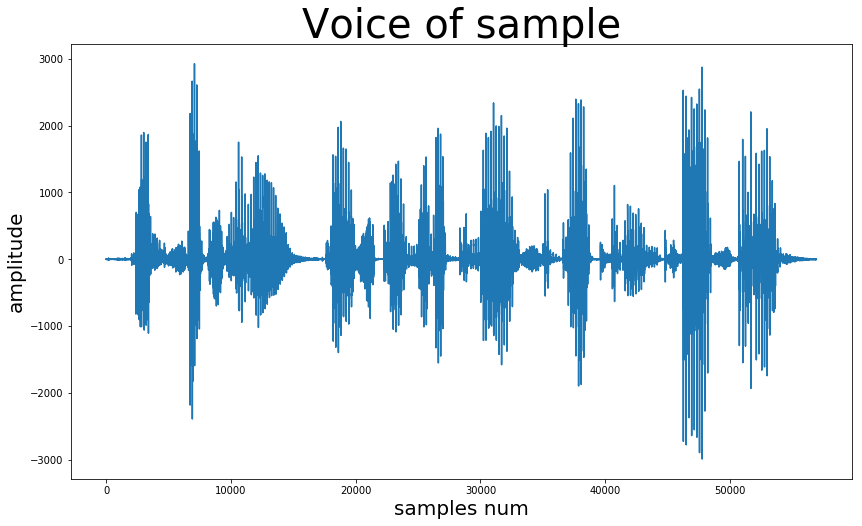

In [12]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(samples),len(samples)),samples) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.title("Voice of sample",fontsize=40)
plt.xlabel("samples num",fontsize=20)
plt.ylabel("amplitude",fontsize=20)
plt.show()

# 2. Frame segmentation

**Reason of Frame**  : the samples can be divided into frames because that on short time scales the audio signal doesn't change much (when we say it doesn't change, we mean statistically i.e. statistically stationary, obviously the samples are constantly changing on even short time scales).

if the frame size is too short, we can't get reliable spectral estimate, if too large, signal changed too much in one frame

In [13]:
t_feed=10 #feed time
t_frame=20 #frame time
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
L_value

320

In [14]:
def frame_segment(samples):
    #frame_num = K 
    frame_num=np.int((len(samples)-L_value)/(fs*t_feed))+1 #calculate the number of frames
    frame_set=[]
    for k in range(frame_num):
        frame_set.append(samples[k*np.int(fs*t_feed):k*np.int(fs*t_feed)+L_value])#[0,n] contains 0~n-1
    return frame_set,frame_num

In [15]:
frame_set,frame_num=frame_segment(samples)

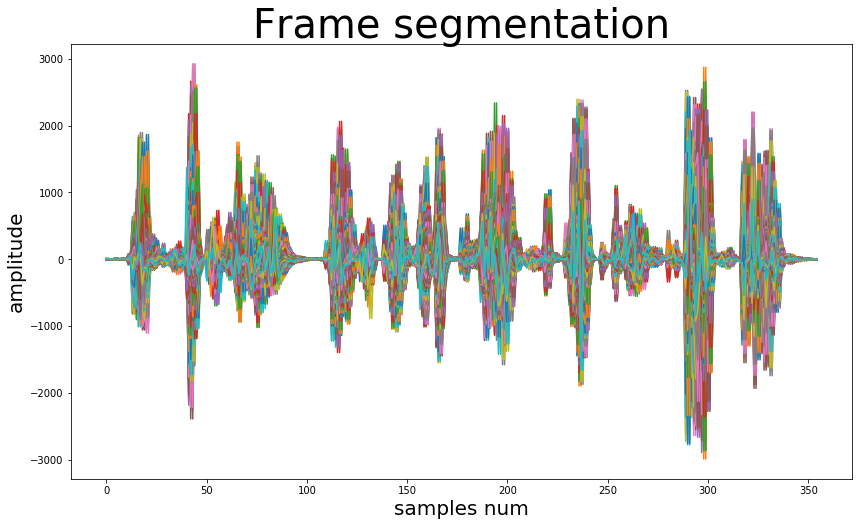

In [17]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(frame_set),len(frame_set)),frame_set) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.title("Frame segmentation",fontsize=40)
plt.xlabel("samples num",fontsize=20)
plt.ylabel("amplitude",fontsize=20)
plt.show()

# 3. Voice activity detection

In [16]:
len(frame_set)

354

In [17]:
#combined function
def voice_activity_detection(frame_set,frame_num,gamma=2.0):
    #step1:figure out the noise signal power
    mixed_power_set=[]
    for k in range(frame_num):
        mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars
    #step2:The noise power
    t_n=100
    frame_drop=np.int((t_n/t_feed)-1)
    no_speech_set=frame_set[:frame_drop]
    noise_power_set=(1/frame_drop)*np.sum(no_speech_set)
    #step3: detective
    mixed_power_set=pd.Series(mixed_power_set)
    train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
    train_frame_set=[]
    for index in train_power_set.index:
        train_frame_set.append(frame_set[index])
    train_frame_set=np.array(train_frame_set)
    return train_frame_set

In [18]:
train_frame_set=voice_activity_detection(frame_set,frame_num)
train_frame_set.shape

(303, 320)

## Step 1:

try to figure out the noise signal power from the mixed signal power

In [19]:
mixed_power_set=[]
for k in range(frame_num):
    mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars

In [20]:
len(mixed_power_set)

354

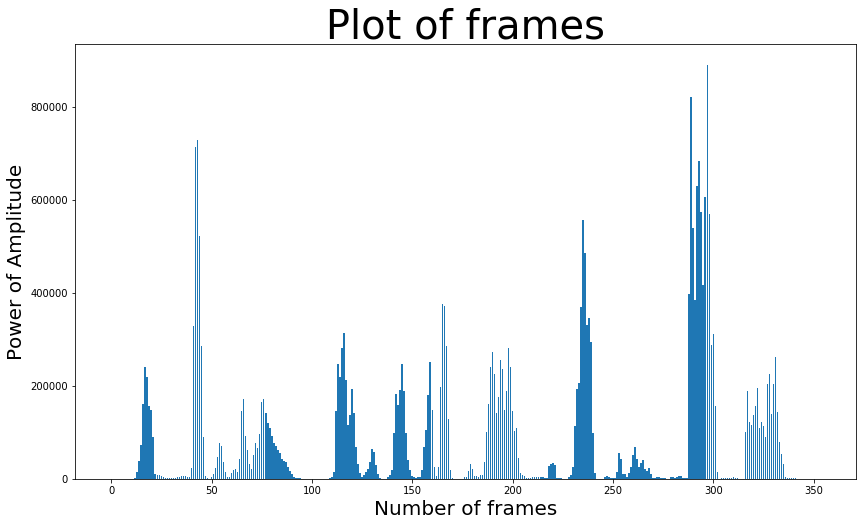

In [21]:
plt.figure(figsize=(14,8))
plt.bar(range(frame_num),mixed_power_set)  #plt,bar(index,height(value))
plt.title("Plot of frames",fontsize=40)
plt.ylabel("Power of Amplitude",fontsize=20)
plt.xlabel("Number of frames",fontsize=20)
plt.show()

## Step 2:

drop first $t_{n}$ samples becasue of silence

In [22]:
t_n=100
K_drop=np.int((t_n/t_feed)-1)

In [23]:
no_speech_set=frame_set[:K_drop]
noise_power_set=(1/K_drop)*np.sum(no_speech_set)

## Step 3

try to find a $\gamma$ as the threshold to satisfied that :
$$P(k)\lessgtr\gamma * P_{N}$$, only the frames containing speech should be used to train the classification model

In [24]:
gamma=2.0
mixed_power_set=pd.Series(mixed_power_set)

In [25]:
train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
train_power_set

11        350.484375
12        779.643750
13      14529.096875
14      39194.428125
15      71741.087500
16     159981.756250
17     239600.043750
18     219217.375000
19     157418.003125
20     147944.953125
21      90521.159375
22      11248.253125
23       8537.540625
24       8251.496875
25       6363.478125
26       3771.684375
27       1709.490625
28       2435.490625
29       2392.750000
30        836.228125
31       1408.478125
32       2248.937500
33       3226.865625
34       4199.665625
35       5383.706250
36       5859.137500
37       5240.287500
38       4897.734375
39       3032.731250
40      22671.318750
           ...      
310      3024.900000
311      2233.887500
312       931.840625
316    100233.306250
317    188781.050000
318    121376.384375
319    115455.496875
320    138237.175000
321    157101.178125
322    196125.740625
323    108529.915625
324    122800.396875
325    112930.512500
326     89000.459375
327    203219.696875
328    225605.446875
329    140047

In [26]:
train_frame_set=[]
for index in train_power_set.index:
    train_frame_set.append(frame_set[index])

In [27]:
train_frame_set=np.array(train_frame_set)
train_frame_set.shape

(303, 320)

# 4. Feature extraction

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. 

**Window**

we use Von_Hann_Fester to minimize the effect 

In [28]:
def window_func(train_frame_set):
    window = np.hanning(len(train_frame_set[0]))
    #window = np.hamming(len(train_frame_set[0]))
    train_frame_set=np.float64(train_frame_set)
    frame_windowed_set=np.multiply(train_frame_set,window) # apply the window to the frames
    #using np.multiply , multipy by elements
    return frame_windowed_set

we plot the hanning window and see

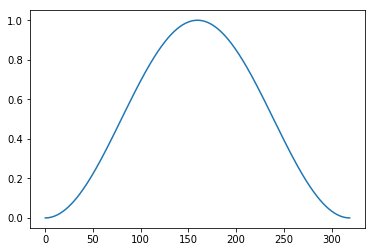

In [29]:
#window on the time domain
plt.plot(range(len(train_frame_set[0])),np.hanning(len(train_frame_set[0]))) ####
plt.show()

In [33]:
#the window on the frequency domain
pow_frames_window,mag_frames_window=Flourier_transfer(np.hanning(len(train_frame_set[0])),NFFT)

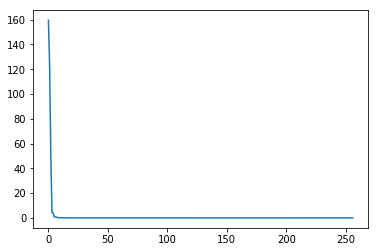

In [34]:
plt.plot(mag_frames_window)
plt.show()

In [35]:
frame_windowed_set= window_func(train_frame_set)

** Fourier-Transform and Power Spectrum**

When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

We would generally perform a 512 point FFT and keep oly the first 257 coefficents.

In [32]:
NFFT=512
#mag_frames = np.absolute(np.fft.rfft(sample_frame, NFFT))  # Magnitude of the FFT
#mag_frames = np.absolute(np.fft.fft(sample_frame, NFFT))
def Flourier_transfer(frame_windowed_set,NFFT):
    mag_frames = np.absolute(np.fft.rfft(frame_windowed_set, NFFT)) 
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) 
    return pow_frames,mag_frames

In [36]:
pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)

In [37]:
#leak = unwindowed
pow_frames_leak,mag_frames_leak=Flourier_transfer(train_frame_set,NFFT)

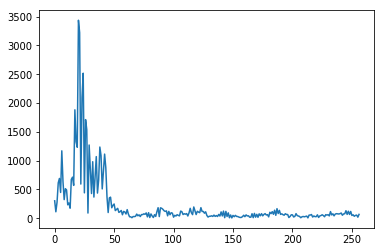

In [38]:
plt.plot(mag_frames_leak[1,:]) # without window(with spectral leakage)

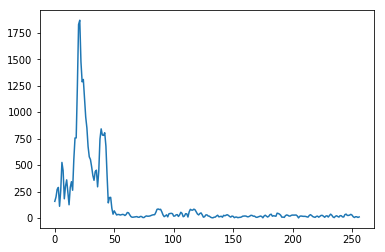

In [39]:
plt.plot(mag_frames[1,:]) # the frequency of each frame(with window)

**Mel Scale Function**

In [40]:
def Mel_scale(freq_orig):
    if freq_orig <= 1000:
        f_mel = freq_orig
    else:
        f_mel = 2595 * np.log10(1 + (freq_orig/2) / 700)
    return f_mel

** Mel Scale Inverse Function**

In [41]:
def Mel_scale_inv(f_mel):
    f_orig = 700 * (10**(f_mel / 2595) - 1)
    return f_orig

In [42]:
#sample_rate=16000
nfilt = 22
def mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt):
    low_freq_mel = 0
    #(sample_rate/2)??? because of rfft?
    high_freq_mel = Mel_scale(sample_rate)  # Convert Hz to Mel #Mel Scale function 
    # nfilt + 2: add the boundary points
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = Mel_scale_inv(mel_points)  # Convert Mel to Hz  # Power Spectrum # Inverse function
    bins = np.floor((NFFT + 1) * hz_points / sample_rate)
    # fbank = Figure 3.9 22 triangular filter set
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bins[m - 1])   # left
        f_m = int(bins[m])             # center
        f_m_plus = int(bins[m + 1])    # right
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    #filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability #np.where: return the index of filter_banks == 0
    #filter_banks = 20 * np.log10(filter_banks)  # dB
    return filter_banks.T,fbank,hz_points

then we plot the mel filter bank and see

In [43]:
filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)

In [44]:
def mel_plot(fbank,hz_points):
    plt.figure(figsize=(14,8))
    plt.title("mel-filter-bank",size=30)
    plt.xlabel("frequency",size=20)
    plt.ylabel("Amplitude",size=20)
    
    for i in range(fbank.shape[0]):
        plt.plot(np.linspace(0,np.int32(hz_points[-1]),(NFFT+2)/2),fbank[i])
    plt.show()

/Users/Mata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



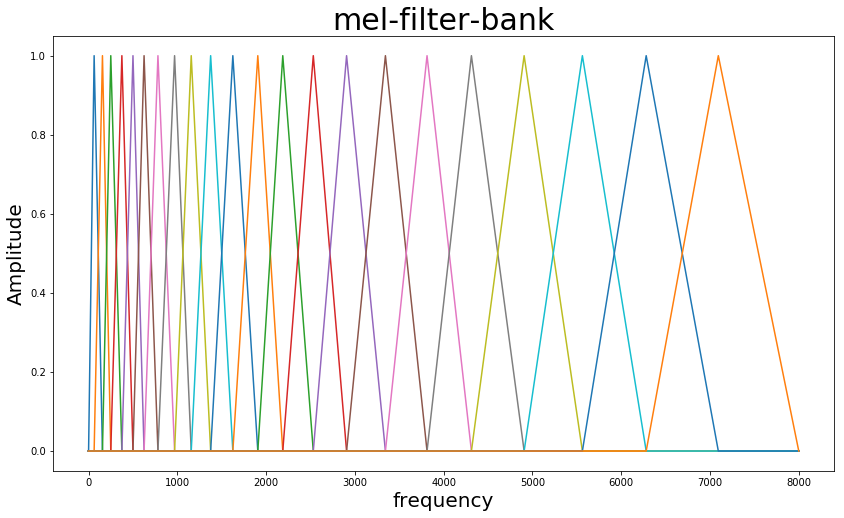

In [45]:
mel_plot(fbank,hz_points)

calculate the feature vectore $\underline{b}$ using DCT

In [46]:
num_features = 15 
#b_n = np.zeros((num_features,303))
#train_frame_set = (303,320)
def DCT(Y,num_features):
    b_n =0
    b_set=[]
    for n_value in range(num_features):    
        for m in range(Y.shape[0]):
            b_n=np.around(np.log10(Y[m]))*np.cos(np.around(math.pi*(n_value+1)*(m-0.5)/(Y.shape[0])))#ignore the mean a
            #abandon the n=0
        b_set.append(b_n)
    b_set=np.array(b_set)
    return b_set

In [47]:
b_new = DCT(filter_banks,num_features)
b_new.shape

(15, 303)

In [49]:
ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
#ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)

In [50]:
ubm_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'var', 'K', 'weights', 'D', 'means'])

In [51]:
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights']
ubm_var_set=[]
K_value=49

#transfer variance of UBM to cov
for k in range(K_value):
    ubm_var_set.append(np.diag(ubm_var[k]))
ubm_var_set=np.array(ubm_var_set)
ubm_var=ubm_var_set

In [52]:
ubm_means.shape

(49, 15)

# 5. Probabilistic model of speech

## 5.1: Universal Background Model

naive GMM-UBM --**ubm_value_set:**$$P_{UBM}(\underline{b})=\sum_{k=1}^{K}\omega_{UBM,k}*p(\underline{b}|\underline{\mu}_{UBM,k},C_{UBM,k})$$

In [53]:
K_value=ubm_var.shape[0] #number of naive models
T_value=b_new.shape[1] #number of frames

In [54]:
math.pi

3.141592653589793

In [55]:
np.linalg.det(ubm_var[0])

30377.627841330639

In [56]:
np.exp(0)

1.0

In [57]:
np.exp((-0.5)*np.dot(np.dot((b_new[:,0]-ubm_means[0]),np.linalg.inv(ubm_var[0,:,:])),(b_new[:,0]-ubm_means[0])))

8.7835272004787672e-13

In [58]:
# probability density function
def density_func(b_new,ubm_means,ubm_var,T_value_1,K_value_1):
    D=b_new.shape[0]
    prob=(1/((2*math.pi)**(D/2)*(np.linalg.det(ubm_var[K_value_1,:,:]))**(1/2)))*\
    np.exp((-0.5)*np.dot(np.dot((b_new[:,T_value_1]-ubm_means[K_value_1]),np.linalg.inv(ubm_var[K_value_1,:,:])),(b_new[:,K_value_1]-ubm_means[K_value_1])))
    return prob
    

In [59]:
b_new.shape[1]

303

In [60]:
#calculate the naive GMM-UBM
def naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value):
    ubm_value_set=[]
    for t in range(T_value): 
        prob_ubm=[]
        for i in range(K_value):
            ubm_pdf=density_func(b_new,ubm_means,ubm_var,t,i)
            prob_ubm.append(ubm_pdf)
        prob_ubm=np.array(prob_ubm)
        ubm_value = np.dot(ubm_weights,prob_ubm)
        #ubm_value = np.dot(ubm_weights,prob_ubm).flatten()
        ubm_value_set.append(ubm_value)
    ubm_value_set=np.array(ubm_value_set)
    return ubm_value_set

In [61]:
start=time.time()
ubm_value_set=naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value)
print(time.time()-start)

0.8153460025787354


In [62]:
ubm_value_set.shape

(303, 1)

## 5.2 Speaker models adaption

GMM model for a particular speaker with his training data is adapted from the UBM-GMM in equation by modifying the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$,first we calcualte the posteriori probability $$p=\frac{a}{b},1\leq t\leq T$$

### 5.2.1 posteriori probability

In [63]:
def post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value):
    model_set=[] #include 49 models
    for k in range(K_value):
        frame_set=[] #include number of frames
        for t in range(T_value):
            frame_set.append(ubm_weights[:,k]*density_func(b_new,ubm_means,ubm_var,t,k)/ubm_value_set[t,:])
        frame_set=np.array(frame_set)
        model_set.append(frame_set)
    model_set=np.array(model_set)
    return model_set.reshape(model_set.shape[0],model_set.shape[1])

In [64]:
model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)

In [65]:
model_set.shape

(49, 303)


### 5.2.2 Mean

In [66]:
np.sum(model_set,axis=1).shape

(49,)

In [67]:
def mu_model(model_set,b_new):
    value_temp=np.dot(model_set,b_new.T)
    mu_ubm=np.multiply((1/np.sum(model_set,axis=1)),value_temp.T)
    return mu_ubm.T

In [68]:
mu_ubm=mu_model(model_set,b_new)

In [69]:
mu_ubm.shape

(49, 15)

In [70]:
mu_ubm

array([[-1.00021318,  0.97008308, -0.92053677,  0.8525659 , -0.76753093,
         0.66713382,  0.4122951 , -0.53833399,  0.65359812, -0.75578047,
         0.84283588, -0.91302192,  0.96493382, -0.99753257,  1.01016569],
       [-1.16677793,  1.13163029, -1.07383306,  0.99454306, -0.89534728,
         0.77823111,  0.48095429, -0.62798234,  0.76244132, -0.88164003,
         0.98319271, -1.06506678,  1.12562353, -1.16365091,  1.17838782],
       [-1.72209344,  1.67021766, -1.58491246,  1.46788523, -1.32147827,
         1.14862191,  0.70985936, -0.92686384,  1.12531713, -1.3012472 ,
         1.45113279, -1.57197395,  1.66135204, -1.71747816,  1.73922894],
       [-1.02165183,  0.99087592, -0.94026763,  0.87083987, -0.78398225,
         0.68143322,  0.42113227, -0.54987268,  0.66760739, -0.77197993,
         0.86090129, -0.93259171,  0.98561629, -1.01891376,  1.03181766],
       [-0.99337595,  0.96345182, -0.9142442 ,  0.84673796, -0.76228427,
         0.66257345,  0.40947675, -0.53465406, 

### 5.2.3 Covariance

In [71]:
mu_temp =[]
for m in range(K_value):
    mu_temp.append(np.dot(mu_ubm[m,:].reshape(-1,1),mu_ubm[m,:].reshape(1,-1)))
    

In [72]:
mu_temp=np.array(mu_temp)

In [73]:
b_temp=[]
for t in range(T_value):
    b_temp.append(np.dot(b_new[:,t].reshape(-1,1),b_new[:,t].reshape(1,-1)))
b_temp=np.array(b_temp)
b_temp.shape

(303, 15, 15)

In [74]:
np.outer(mu_ubm[0,:],mu_ubm[0,:]).shape

(15, 15)

In [75]:
(b_new[:,0]-mu_ubm[0,:])**2

array([ 0.95995281,  0.9029893 ,  0.81310573,  0.69746218,  0.56527075,
        0.42706173,  0.16311019,  0.27807909,  0.40990794,  0.5480953 ,
        0.68163326,  0.79988426,  0.8934285 ,  0.95481429,  0.97915167])

In [76]:
def cov_model(model_set,b_new,mu_ubm,T_value):
    value_temp = []
    b_temp = []
    sum_temp=[]
    mu_temp =[]
    cov_set =[]
    #calculate mu*mu.T
    for m in range(K_value):
        mu_temp.append(np.diag(mu_ubm[m,:]**2))
    mu_temp=np.array(mu_temp)
    #calculate b*b.T
    for t in range(T_value):
        b_temp.append((b_new[:,t]**2))
    b_temp=np.array(b_temp)
    #print(b_temp.shape)
    #calculate sum(p(k|b)*b*b.T)
    value_temp=np.dot(model_set,b_temp)
    #value_temp=value_temp.reshape(K_value,15,15)
    #sum(p(k|b))
    sum_value = np.sum(model_set,axis=1)
    #calculate cov
    for k in range(K_value):
        cov_set.append(np.diag((1/sum_value[k])*value_temp[k])-mu_temp[k,:,:])
    cov_set=np.array(cov_set)
    return cov_set

In [77]:
model_set.shape

(49, 303)

In [80]:
cov_set=[]
cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
cov_set[46]

(303, 15)


array([[ 0.03090381,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.02906998,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.02617636,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.02245344,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01819779,
         0.        ,  0.        ,  0.        , 

### 5.2.4 Weight 

weight of K mode

In [81]:
def weight_model(model_set,T_value):
    return (1/T_value)*np.sum(model_set,axis=1)

In [82]:
weights_model=weight_model(model_set,T_value)

In [83]:
weights_model.shape

(49,)

In [84]:
np.sum(weights_model)

1.0

## 5.3 Speaker model adaption

Now we combine the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ of the k_th mode of the UBM-GMM with $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ to obtain the paramenters of the adapted k-th mode of the speaker specific GMM:
$$p=\frac{a}{b},1\leq t\leq T$$

In [85]:
#gamma_UBM = 0.0000000000000000000000000000000001 
#gamma_UBM=0.1
#alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

Function:adapted_mode to update k_th mode of the speaker specific GMM

In [86]:
def adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=0):
    
    #caculate alpha
    alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

    #caculate the adapted mean
    new_mu=np.multiply(alpha,mu_ubm.T)+np.multiply((1-alpha),ubm_means.T)

    #calculate adapted variance    
    new_cov=np.multiply(alpha,cov_set.T)+np.multiply((1-alpha),ubm_var.T)
    #print(new_cov[0])
    #calculate adapted mean
    new_weight=np.multiply(alpha,weights_model)+np.multiply((1-alpha),ubm_weights.ravel())
    return new_mu.T,new_cov.T,new_weight

Function:save_model() to store the set of paraments for each model

In [88]:
def save_model(name,new_mu,new_cov,new_weight):
    #save_path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"\
    #+str(name)+".mat"
    save_path="/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/"\
    +str(name)+".mat"
    savemat(save_path,{'mu':new_mu,'new_cov':new_cov,'new_weight':new_weight})   

In [89]:
new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights)

In [90]:
save_model('mrpc0',new_mu,new_cov,new_weight)

# 6: Speaker identification

In [91]:
#identification
def identification(b_test,new_mu,new_cov,new_weight,T_value):
    #caculate the concatenated probability
    test_pdf=naive_G_U(b_test,new_mu,new_cov,new_weight,T_value)
    #print(test_pdf)
    concate_prob=np.sum(np.log(test_pdf))
    return concate_prob

In [92]:
new_cov[0]

array([[ 0.01011711,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00951676,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00856946,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00735067,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00595748,
         0.        ,  0.        ,  0.        , 

In [93]:
concate_prob=identification(b_new,new_mu,new_cov,new_weight,T_value)

In [94]:
concate_prob

12969.290579454511

# 7. Cross Validation

In [95]:
def feature_eng(dataset):
    #2. frame_segmentation
    frame_set,frame_num=frame_segment(dataset)
    
    #3. Voice activaty detection
    #gamma = 100.0
    train_frame_set=voice_activity_detection(frame_set,frame_num,gamma=100.0)
    
    #4.1 window_func
    frame_windowed_set= window_func(train_frame_set)
    
    #4.2 fft
    pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)
    
    #4.3 filtered
    filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)
    
    #4.4 get featured 
    b_new = DCT(filter_banks,num_features)
    return b_new

In [109]:
def feature_eng_part1(dataset):
    #2. frame_segmentation
    frame_set,frame_num=frame_segment(dataset)
    
    #3. Voice activaty detection
    #gamma = 100.0
    train_frame_set=voice_activity_detection(frame_set,frame_num,gamma=100.0)
    return train_frame_set

In [110]:
def feature_eng_part2(train_frame_set):
    #4.1 window_func
    frame_windowed_set= window_func(train_frame_set)
    
    #4.2 fft
    pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)
    
    #4.3 filtered
    filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)
    
    #4.4 get featured 
    b_new = DCT(filter_banks,num_features)
    return b_new

In [96]:
def speaker_adapted(b_new,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value):
    model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)
    
    mu_ubm=mu_model(model_set,b_new)
    
    cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
    
    weights_model=weight_model(model_set,T_value)
    
    new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=0)
    
    return new_mu,new_cov,new_weight

now we apply the cross validation onto 10 people

In [97]:
#cross validation for 20 models
#default 
t_feed=10 #feed time
t_frame=20 #frame time
sample_rate=16000
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
NFFT=512
nfilt=22

# extract the wav files 
test_file_set=[]
name_set=[]
start=time.time()
for name in ['faks0', 'fdac1', 'felc0', 'fjem0',\
             'mdab0', 'mjsw0', 'mreb0', 'mrjo0', \
             'msjs1', 'mstk0', 'mwbt0', 'fcmr0',\
             'fdrd1', 'fjas0', 'fjre0', 'fjwb0', \
             'fpas0', 'fram1', 'fslb1', 'mabw0']:
    whole_set=dataset.get(name,'no such file').copy()
    
    print("now the this model is for person "+name)
    print("Model Start")
    #add copy to prevent original change
    #score_set=[]
    
    #obtain test and train set, (test set temporarily use the first file)
    test_file=whole_set[0]
    test_file_set.append(test_file)
    name_set.append(name)
    train_set=whole_set.copy()
    train_set.remove(test_file)
    train_set=np.concatenate(train_set)
    
    #feature engineering 
    K_value=ubm_var.shape[0] #number of naive models
    
    b_train=feature_eng(train_set)
    
    T_value=b_train.shape[1] #number of frames
    #5.1 naive GMM-UBM
    ubm_value_set=naive_G_U(b_train,ubm_means,ubm_var,ubm_weights,T_value)
    
    #5.2 Speaker adaption
    new_mu,new_cov,new_weight=speaker_adapted(b_train,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value)
    #print(b_test.shape,new_mu.shape,new_cov.shape,new_weight.shape)
    save_model(name,new_mu,new_cov,new_weight)
    
    print(str(name)+" spend time %5.1f minute"%((time.time()-start)/60))
    
print("Traing compeleted")
    
    
    

now the this model is for person faks0
Model Start
(1419, 15)
faks0 spend time   0.2 minute
now the this model is for person fdac1
Model Start
(1841, 15)
fdac1 spend time   0.4 minute
now the this model is for person felc0
Model Start
(1719, 15)
felc0 spend time   0.6 minute
now the this model is for person fjem0
Model Start
(2337, 15)
fjem0 spend time   0.8 minute
now the this model is for person mdab0
Model Start
(1120, 15)
mdab0 spend time   0.9 minute
now the this model is for person mjsw0
Model Start
(1372, 15)
mjsw0 spend time   1.0 minute
now the this model is for person mreb0
Model Start
(1241, 15)
mreb0 spend time   1.1 minute
now the this model is for person mrjo0
Model Start
(1034, 15)
mrjo0 spend time   1.2 minute
now the this model is for person msjs1
Model Start
(854, 15)
msjs1 spend time   1.3 minute
now the this model is for person mstk0
Model Start
(986, 15)
mstk0 spend time   1.4 minute
now the this model is for person mwbt0
Model Start
(1636, 15)
mwbt0 spend time   1

In [118]:
#cross validation for 20 models
#default 
t_feed=10 #feed time
t_frame=20 #frame time
sample_rate=16000
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
NFFT=512
nfilt=22

# extract the wav files 
test_file_set=[]
name_set=[]
start=time.time()
for name in ['faks0', 'fdac1', 'felc0', 'fjem0',\
             'mdab0', 'mjsw0', 'mreb0', 'mrjo0', \
             'msjs1', 'mstk0', 'mwbt0', 'fcmr0',\
             'fdrd1', 'fjas0', 'fjre0', 'fjwb0', \
             'fpas0', 'fram1', 'fslb1', 'mabw0']:
    whole_set=dataset.get(name,'no such file').copy()
    train_set=[]
    
    print("now the this model is for person "+name)
    print("Model Start")
    #add copy to prevent original change
    #score_set=[]
    
    #obtain test and train set, (test set temporarily use the first file)
    test_file_1=whole_set[0]
    test_file=feature_eng_part1(test_file_1)
    test_file_set.append(test_file)
    name_set.append(name)
    train_set_1=whole_set.copy()
    train_set_1.remove(test_file_1)
    for index,train_file in enumerate(train_set_1):
        train_set.append(feature_eng_part1(train_file))
    train_set=np.concatenate(train_set)
    
    #feature engineering 
    K_value=ubm_var.shape[0] #number of naive models
    
    b_train=feature_eng_part2(train_set)
    
    T_value=b_train.shape[1] #number of frames
    #5.1 naive GMM-UBM
    ubm_value_set=naive_G_U(b_train,ubm_means,ubm_var,ubm_weights,T_value)
    
    #5.2 Speaker adaption
    new_mu,new_cov,new_weight=speaker_adapted(b_train,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value)
    #print(b_test.shape,new_mu.shape,new_cov.shape,new_weight.shape)
    save_model(name,new_mu,new_cov,new_weight)
    
    print(str(name)+" spend time %5.1f minute"%((time.time()-start)/60))
    
print("Traing compeleted")
    
    
    

now the this model is for person faks0
Model Start
(1509, 15)
faks0 spend time   0.1 minute
now the this model is for person fdac1
Model Start
(1927, 15)
fdac1 spend time   0.3 minute
now the this model is for person felc0
Model Start
(1488, 15)
felc0 spend time   0.4 minute
now the this model is for person fjem0
Model Start
(1960, 15)
fjem0 spend time   0.6 minute
now the this model is for person mdab0
Model Start
(1147, 15)
mdab0 spend time   0.7 minute
now the this model is for person mjsw0
Model Start
(1359, 15)
mjsw0 spend time   0.8 minute
now the this model is for person mreb0
Model Start
(1173, 15)
mreb0 spend time   1.0 minute
now the this model is for person mrjo0
Model Start
(1046, 15)
mrjo0 spend time   1.1 minute
now the this model is for person msjs1
Model Start
(1304, 15)
msjs1 spend time   1.2 minute
now the this model is for person mstk0
Model Start
(949, 15)
mstk0 spend time   1.3 minute
now the this model is for person mwbt0
Model Start
(1574, 15)
mwbt0 spend time   

In [120]:
# identification 20 stucks cross validation 
print("Model Start")
start=time.time()
score_set=[]
correct_num=0
false_num=0

for index_2,test_file in enumerate(test_file_set):
    test_set=np.array(test_file)
    K_value=ubm_var.shape[0] #number of naive models
    b_test=feature_eng_part2(test_set)
    T_value=b_test.shape[1]
    eva_set=[]
    for index_1,name in enumerate(name_set):
        #path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"+str(name)+".mat"
        path="/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/"+str(name)+".mat"
        print("the test set is from "+str(name_set[index_2])+" testing the model "+str(name))
        lamda=loadmat(path,mat_dtype=True)
        new_mu=lamda['mu']
        new_cov=lamda['new_cov']
        new_weight=lamda['new_weight']
        scores=identification(b_test,new_mu,new_cov,new_weight,T_value)
        print("test score is ",scores)
        print("time cost %5.1f minute"%((time.time()-start)/60))
        eva_set.append(scores)
    test_name=name_set[eva_set.index(max(eva_set))]
    
    # calculate the detection rate
    if name_set[index_2] == test_name:
        correct_num +=1
    else:
        false_num +=1
print("the detection ratio is "+str(false_num) +" and "+str(correct_num)+" and "+str(correct_num/(correct_num+false_num)))
        

Model Start
the test set is from faks0 testing the model faks0
test score is  -1815.06728044
time cost   0.0 minute
the test set is from faks0 testing the model fdac1
test score is  -1255.21322759
time cost   0.0 minute
the test set is from faks0 testing the model felc0
test score is  -1363.57602211
time cost   0.0 minute
the test set is from faks0 testing the model fjem0
test score is  -664.889364885
time cost   0.0 minute
the test set is from faks0 testing the model mdab0
test score is  -1833.91732744
time cost   0.0 minute
the test set is from faks0 testing the model mjsw0
test score is  8940.14197596
time cost   0.0 minute
the test set is from faks0 testing the model mreb0
test score is  -2674.76212523
time cost   0.1 minute
the test set is from faks0 testing the model mrjo0
test score is  -1397.98350024
time cost   0.1 minute
the test set is from faks0 testing the model msjs1
test score is  -609.284223005
time cost   0.1 minute
the test set is from faks0 testing the model mstk0
te

/Users/Mata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp



test score is  inf
time cost   0.2 minute
the test set is from fdac1 testing the model mreb0
test score is  -2917.59759701
time cost   0.2 minute
the test set is from fdac1 testing the model mrjo0
test score is  -1417.17771358
time cost   0.2 minute
the test set is from fdac1 testing the model msjs1
test score is  1122.61030667
time cost   0.2 minute
the test set is from fdac1 testing the model mstk0
test score is  -1234.39148113
time cost   0.2 minute
the test set is from fdac1 testing the model mwbt0
test score is  -1708.3734366
time cost   0.3 minute
the test set is from fdac1 testing the model fcmr0
test score is  -2181.32596727
time cost   0.3 minute
the test set is from fdac1 testing the model fdrd1
test score is  -1428.68759922
time cost   0.3 minute
the test set is from fdac1 testing the model fjas0
test score is  -2444.7507665
time cost   0.3 minute
the test set is from fdac1 testing the model fjre0
test score is  -1201.16954442
time cost   0.3 minute
the test set is from fdac

test score is  -1427.83762761
time cost   0.8 minute
the test set is from mjsw0 testing the model mreb0
test score is  -4019.65892253
time cost   0.8 minute
the test set is from mjsw0 testing the model mrjo0
test score is  -2756.20261578
time cost   0.8 minute
the test set is from mjsw0 testing the model msjs1
test score is  1318.39395007
time cost   0.8 minute
the test set is from mjsw0 testing the model mstk0
test score is  -2676.27827374
time cost   0.8 minute
the test set is from mjsw0 testing the model mwbt0
test score is  -3560.83740108
time cost   0.8 minute
the test set is from mjsw0 testing the model fcmr0
test score is  -2350.4508447
time cost   0.9 minute
the test set is from mjsw0 testing the model fdrd1
test score is  -2304.14437983
time cost   0.9 minute
the test set is from mjsw0 testing the model fjas0
test score is  -2011.33257421
time cost   0.9 minute
the test set is from mjsw0 testing the model fjre0
test score is  -2070.0238502
time cost   0.9 minute
the test set i

test score is  2171.9579857
time cost   1.3 minute
the test set is from mstk0 testing the model mrjo0
test score is  940.962537187
time cost   1.3 minute
the test set is from mstk0 testing the model msjs1
test score is  4643.42043518
time cost   1.3 minute
the test set is from mstk0 testing the model mstk0
test score is  1455.52050619
time cost   1.3 minute
the test set is from mstk0 testing the model mwbt0
test score is  818.513492761
time cost   1.3 minute
the test set is from mstk0 testing the model fcmr0
test score is  2977.95094152
time cost   1.3 minute
the test set is from mstk0 testing the model fdrd1
test score is  378.465399253
time cost   1.3 minute
the test set is from mstk0 testing the model fjas0
test score is  836.45872179
time cost   1.3 minute
the test set is from mstk0 testing the model fjre0
test score is  347.400164793
time cost   1.3 minute
the test set is from mstk0 testing the model fjwb0
test score is  283.728329576
time cost   1.3 minute
the test set is from ms

test score is  1141.46034216
time cost   1.8 minute
the test set is from fjas0 testing the model mrjo0
test score is  1656.66402273
time cost   1.8 minute
the test set is from fjas0 testing the model msjs1
test score is  1941.39231046
time cost   1.8 minute
the test set is from fjas0 testing the model mstk0
test score is  1230.92650368
time cost   1.8 minute
the test set is from fjas0 testing the model mwbt0
test score is  1797.44396904
time cost   1.8 minute
the test set is from fjas0 testing the model fcmr0
test score is  1143.43344265
time cost   1.9 minute
the test set is from fjas0 testing the model fdrd1
test score is  3078.55593016
time cost   1.9 minute
the test set is from fjas0 testing the model fjas0
test score is  593.202645058
time cost   1.9 minute
the test set is from fjas0 testing the model fjre0
test score is  2644.4899573
time cost   1.9 minute
the test set is from fjas0 testing the model fjwb0
test score is  1174.18239494
time cost   1.9 minute
the test set is from f

test score is  -1698.31434168
time cost   2.5 minute
the test set is from fram1 testing the model mrjo0
test score is  292.225188465
time cost   2.5 minute
the test set is from fram1 testing the model msjs1
test score is  643.602853868
time cost   2.6 minute
the test set is from fram1 testing the model mstk0
test score is  504.548056274
time cost   2.6 minute
the test set is from fram1 testing the model mwbt0
test score is  90.3670928044
time cost   2.6 minute
the test set is from fram1 testing the model fcmr0
test score is  -2419.74275726
time cost   2.6 minute
the test set is from fram1 testing the model fdrd1
test score is  631.2641905
time cost   2.6 minute
the test set is from fram1 testing the model fjas0
test score is  -300.877434352
time cost   2.6 minute
the test set is from fram1 testing the model fjre0
test score is  -1111.51748993
time cost   2.7 minute
the test set is from fram1 testing the model fjwb0
test score is  240.304634931
time cost   2.7 minute
the test set is fro

In [101]:
len(test_file_set)

20

In [102]:
name_set

['faks0',
 'fdac1',
 'felc0',
 'fjem0',
 'mdab0',
 'mjsw0',
 'mreb0',
 'mrjo0',
 'msjs1',
 'mstk0',
 'mwbt0',
 'fcmr0',
 'fdrd1',
 'fjas0',
 'fjre0',
 'fjwb0',
 'fpas0',
 'fram1',
 'fslb1',
 'mabw0']

In [106]:
# identification 20 stucks cross validation 
print("Model Start")
start=time.time()
score_set=[]
correct_num=0
false_num=0

for index_2,test_file in enumerate(test_file_set):
    test_set=np.array(test_file)
    K_value=ubm_var.shape[0] #number of naive models
    b_test=feature_eng(test_set)
    T_value=b_test.shape[1]
    eva_set=[]
    for index_1,name in enumerate(name_set):
        #path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"+str(name)+".mat"
        path="/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/"+str(name)+".mat"
        print("the test set is from "+str(name_set[index_2])+" testing the model "+str(name))
        lamda=loadmat(path,mat_dtype=True)
        new_mu=lamda['mu']
        new_cov=lamda['new_cov']
        new_weight=lamda['new_weight']
        scores=identification(b_test,new_mu,new_cov,new_weight,T_value)
        print("test score is ",scores)
        print("time cost %5.1f minute"%((time.time()-start)/60))
        eva_set.append(scores)
    test_name=name_set[eva_set.index(max(eva_set))]
    
    # calculate the detection rate
    if name_set[index_2] == test_name:
        correct_num +=1
    else:
        false_num +=1
print("the detection ratio is "+str(false_num) +" and "+str(correct_num)+" and "+str(correct_num/(correct_num+false_num)))
        
        
        
        

Model Start
the test set is from faks0 testing the model faks0
test score is  -1824.43838871
time cost   0.0 minute
the test set is from faks0 testing the model fdac1
test score is  -1219.00127265
time cost   0.0 minute
the test set is from faks0 testing the model felc0
test score is  -1499.94584099
time cost   0.0 minute
the test set is from faks0 testing the model fjem0
test score is  -848.275678324
time cost   0.0 minute
the test set is from faks0 testing the model mdab0
test score is  -1795.04362352
time cost   0.0 minute
the test set is from faks0 testing the model mjsw0
test score is  9232.30518165
time cost   0.0 minute
the test set is from faks0 testing the model mreb0
test score is  -2640.34084472
time cost   0.1 minute
the test set is from faks0 testing the model mrjo0
test score is  -1373.20794338
time cost   0.1 minute
the test set is from faks0 testing the model msjs1
test score is  -205.709852873
time cost   0.1 minute
the test set is from faks0 testing the model mstk0
te

/Users/Mata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp



test score is  inf
time cost   0.2 minute
the test set is from fdac1 testing the model mreb0
test score is  -2866.90761508
time cost   0.2 minute
the test set is from fdac1 testing the model mrjo0
test score is  -1391.62631159
time cost   0.3 minute
the test set is from fdac1 testing the model msjs1
test score is  1153.22813719
time cost   0.3 minute
the test set is from fdac1 testing the model mstk0
test score is  -1272.74406275
time cost   0.3 minute
the test set is from fdac1 testing the model mwbt0
test score is  -1695.280765
time cost   0.3 minute
the test set is from fdac1 testing the model fcmr0
test score is  -2230.39140357
time cost   0.3 minute
the test set is from fdac1 testing the model fdrd1
test score is  -1525.85077421
time cost   0.3 minute
the test set is from fdac1 testing the model fjas0
test score is  -2452.32350257
time cost   0.3 minute
the test set is from fdac1 testing the model fjre0
test score is  -1455.03569079
time cost   0.3 minute
the test set is from fdac

test score is  -1441.77676329
time cost   0.8 minute
the test set is from mjsw0 testing the model mreb0
test score is  -3966.10562938
time cost   0.8 minute
the test set is from mjsw0 testing the model mrjo0
test score is  -2759.24106888
time cost   0.8 minute
the test set is from mjsw0 testing the model msjs1
test score is  2179.49942538
time cost   0.8 minute
the test set is from mjsw0 testing the model mstk0
test score is  -2725.7751036
time cost   0.8 minute
the test set is from mjsw0 testing the model mwbt0
test score is  -3524.96395644
time cost   0.8 minute
the test set is from mjsw0 testing the model fcmr0
test score is  -2361.93435242
time cost   0.8 minute
the test set is from mjsw0 testing the model fdrd1
test score is  -2437.7468213
time cost   0.8 minute
the test set is from mjsw0 testing the model fjas0
test score is  -2024.67084237
time cost   0.9 minute
the test set is from mjsw0 testing the model fjre0
test score is  -2026.26084373
time cost   0.9 minute
the test set i

/Users/Mata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in double_scalars



test score is  inf
time cost   1.0 minute
the test set is from mreb0 testing the model mreb0
test score is  4165.36799983
time cost   1.0 minute
the test set is from mreb0 testing the model mrjo0
test score is  3703.79965845
time cost   1.0 minute
the test set is from mreb0 testing the model msjs1
test score is  3731.84063357
time cost   1.0 minute
the test set is from mreb0 testing the model mstk0
test score is  4242.64684512
time cost   1.0 minute
the test set is from mreb0 testing the model mwbt0
test score is  6082.21559336
time cost   1.0 minute
the test set is from mreb0 testing the model fcmr0
test score is  3795.20030238
time cost   1.0 minute
the test set is from mreb0 testing the model fdrd1
test score is  8317.06474987
time cost   1.0 minute
the test set is from mreb0 testing the model fjas0
test score is  9305.43943556
time cost   1.0 minute
the test set is from mreb0 testing the model fjre0
test score is  12613.6456493
time cost   1.0 minute
the test set is from mreb0 test

test score is  inf
time cost   1.5 minute
the test set is from mwbt0 testing the model mreb0
test score is  -1241.55749559
time cost   1.5 minute
the test set is from mwbt0 testing the model mrjo0
test score is  1146.54143186
time cost   1.5 minute
the test set is from mwbt0 testing the model msjs1
test score is  1434.75214443
time cost   1.5 minute
the test set is from mwbt0 testing the model mstk0
test score is  1078.19873324
time cost   1.5 minute
the test set is from mwbt0 testing the model mwbt0
test score is  1391.63016803
time cost   1.5 minute
the test set is from mwbt0 testing the model fcmr0
test score is  -935.583863934
time cost   1.5 minute
the test set is from mwbt0 testing the model fdrd1
test score is  1524.45308759
time cost   1.5 minute
the test set is from mwbt0 testing the model fjas0
test score is  -336.279406825
time cost   1.5 minute
the test set is from mwbt0 testing the model fjre0
test score is  529.620073939
time cost   1.5 minute
the test set is from mwbt0 t

test score is  inf
time cost   2.1 minute
the test set is from fjre0 testing the model mreb0
test score is  -1592.29718097
time cost   2.1 minute
the test set is from fjre0 testing the model mrjo0
test score is  888.56883036
time cost   2.1 minute
the test set is from fjre0 testing the model msjs1
test score is  3030.74248709
time cost   2.1 minute
the test set is from fjre0 testing the model mstk0
test score is  958.23487714
time cost   2.1 minute
the test set is from fjre0 testing the model mwbt0
test score is  2070.21292535
time cost   2.1 minute
the test set is from fjre0 testing the model fcmr0
test score is  -622.867597762
time cost   2.1 minute
the test set is from fjre0 testing the model fdrd1
test score is  503.289841744
time cost   2.2 minute
the test set is from fjre0 testing the model fjas0
test score is  -310.642520811
time cost   2.2 minute
the test set is from fjre0 testing the model fjre0
test score is  1815.24554633
time cost   2.2 minute
the test set is from fjre0 tes

test score is  inf
time cost   2.8 minute
the test set is from fslb1 testing the model mreb0
test score is  714.057369162
time cost   2.8 minute
the test set is from fslb1 testing the model mrjo0
test score is  3898.03519953
time cost   2.9 minute
the test set is from fslb1 testing the model msjs1
test score is  4357.25593598
time cost   2.9 minute
the test set is from fslb1 testing the model mstk0
test score is  4439.1232993
time cost   2.9 minute
the test set is from fslb1 testing the model mwbt0
test score is  7422.06762568
time cost   2.9 minute
the test set is from fslb1 testing the model fcmr0
test score is  2084.21784045
time cost   2.9 minute
the test set is from fslb1 testing the model fdrd1
test score is  4126.3787794
time cost   2.9 minute
the test set is from fslb1 testing the model fjas0
test score is  921.263799872
time cost   2.9 minute
the test set is from fslb1 testing the model fjre0
test score is  2167.17479017
time cost   2.9 minute
the test set is from fslb1 testin

In [882]:
lamda=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\faks0.mat",mat_dtype=True)

In [ ]:
lamda

In [ ]:
len(test_file_set)

In [ ]:
whole_set=dataset.get('faks0','no such file').copy()

In [ ]:
temp_set=whole_set[0]
whole_set.remove(temp_set)

In [ ]:
len(whole_set)

In [ ]:
np.concatenate(whole_set)